In [ ]:
### Churn Modelling Dataset - Customer Churn Prediction

# ==============================================================================
# 1. Objective and Problem Statement
# ==============================================================================

The objective is to build a classification model to identify bank customers who are likely to leave (churn).
This is a critical business problem as customer retention is key to profitability.The target variable is 'Exited' (1=Churn, 0=Not Churn).


In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# ==============================================================================
# 2. Dataset Understanding and Description
# ==============================================================================

print("## Dataset Understanding")
print(f"Dataset shape: {df.shape}")
print("\nFirst 5 rows of the dataset:")
print(df.head())
print("\nData Information (Non-Null Counts and Dtypes):")
df.info()
print("\nDescriptive Statistics:")
print(df.describe())
print("---------------------------------------------------------------------------------")

## Dataset Understanding
Dataset shape: (10000, 14)

First 5 rows of the dataset:
   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58

In [5]:
# ==============================================================================
# 3. Data Cleaning and Preparation
# ==============================================================================
print("## Data Cleaning and Preparation")

# Step 3.1: Drop Irrelevant Columns
# RowNumber, CustomerId, and Surname are identifiers and do not contribute to prediction.
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print("Dropped 'RowNumber', 'CustomerId', and 'Surname' columns.")
print(f"DataFrame shape after dropping columns: {df.shape}")

# Step 3.2: Separate Features (X) and Target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Step 3.3: Identify Feature Types
categorical_features = ['Geography', 'Gender']
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

# Step 3.4: Create Preprocessing Pipeline (Scaling and Encoding)
# StandardScaler for numerical features (to normalize variance and scale data)
# OneHotEncoder for categorical features (to convert categories into dummy variables), dropping the first column to avoid multicollinearity.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Step 3.5: Split Data into Training and Testing Sets
# Splitting the data 80% train / 20% test.
# stratify=y ensures that the proportion of churned customers is maintained in both sets to handle class imbalance.
X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42, stratify=y
)

print("\nData preprocessing complete (Scaling and One-Hot Encoding).")
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print("---------------------------------------------------------------------------------")

## Data Cleaning and Preparation
Dropped 'RowNumber', 'CustomerId', and 'Surname' columns.
DataFrame shape after dropping columns: (10000, 11)

Data preprocessing complete (Scaling and One-Hot Encoding).
X_train shape: (8000, 11), X_test shape: (2000, 11)
---------------------------------------------------------------------------------


In [8]:
# ==============================================================================
# 4. Exploratory Data Analysis (EDA) with Graphs
# ==============================================================================
print("## Exploratory Data Analysis (EDA)")

# Step 4.1: Target Variable Distribution (Class Imbalance Check)
print("\nChecking Target Variable Distribution:")
churn_rate = y.mean() * 100
print(f"Overall Churn Rate (Exited=1): {churn_rate:.2f}%")


## Exploratory Data Analysis (EDA)

Checking Target Variable Distribution:
Overall Churn Rate (Exited=1): 20.37%


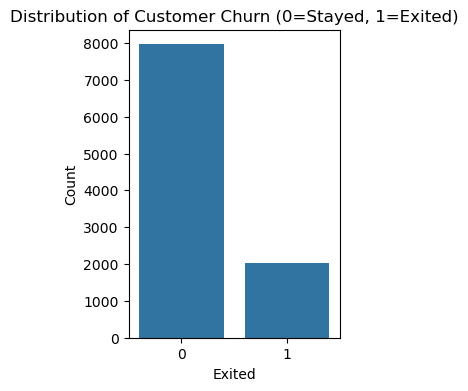

In [10]:
plt.figure(figsize=(6, 4))

# Plot 1: Target variable distribution (Exited)
plt.subplot(1, 2, 1)
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Customer Churn (0=Stayed, 1=Exited)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

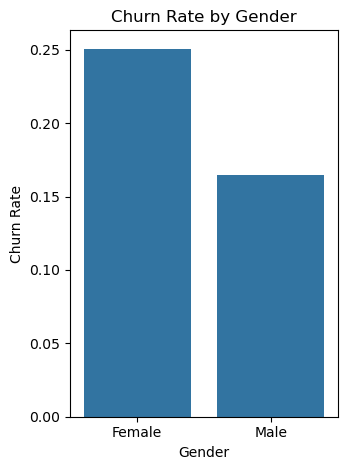

<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

In [12]:
# Plot 2: Churn rate by Gender
plt.subplot(1, 2, 2)
sns.barplot(x='Gender', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.savefig('eda_churn_distribution_gender.png')
plt.show() 

plt.figure(figsize=(6, 4))

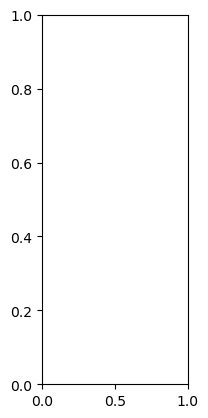

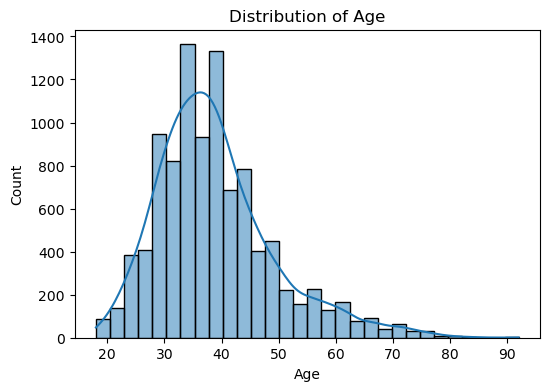

In [13]:
# Plot 3: Distribution of Age
plt.subplot(1, 3, 1)
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.show()

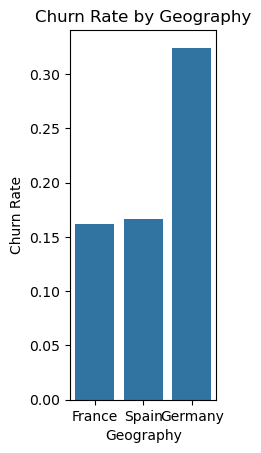

In [14]:
# Plot 4: Churn rate by Geography
plt.subplot(1, 3, 2)
sns.barplot(x='Geography', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate by Geography')
plt.ylabel('Churn Rate')
plt.show()

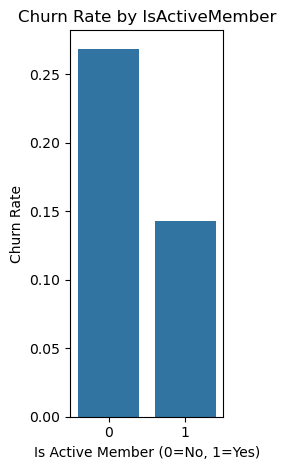


EDA plots saved: 'eda_churn_distribution_gender.png' and 'eda_age_geography_activemember.png'.
Key finding: Class imbalance is present. Churn is higher for Females, customers in Germany, and non-active members.
---------------------------------------------------------------------------------


In [15]:
# Plot 5: Churn rate by IsActiveMember
plt.subplot(1, 3, 3)
sns.barplot(x='IsActiveMember', y='Exited', data=df, errorbar=None)
plt.title('Churn Rate by IsActiveMember')
plt.xlabel('Is Active Member (0=No, 1=Yes)')
plt.ylabel('Churn Rate')

plt.tight_layout()
plt.savefig('eda_age_geography_activemember.png')
plt.show() 
plt.close('all') # Close plots to prevent memory overflow

print("\nEDA plots saved: 'eda_churn_distribution_gender.png' and 'eda_age_geography_activemember.png'.")
print("Key finding: Class imbalance is present. Churn is higher for Females, customers in Germany, and non-active members.")
print("---------------------------------------------------------------------------------")

In [16]:
# ==============================================================================
# 5. Model Training and Testing
# ==============================================================================
print("## Model Training: Random Forest Classifier")

# Step 5.1: Model Instantiation
# Using a Random Forest Classifier due to its robustness and feature importance extraction capabilities.
# class_weight='balanced' is included to mitigate the observed class imbalance.
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced', max_depth=10)

# Step 5.2: Model Training
print("Training the Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Training complete.")

# Step 5.3: Prediction
y_pred = rf_model.predict(X_test)
print("Prediction on the test set complete.")
print("---------------------------------------------------------------------------------")

## Model Training: Random Forest Classifier
Training the Random Forest Classifier...
Training complete.
Prediction on the test set complete.
---------------------------------------------------------------------------------


In [17]:
# ==============================================================================
# 6. Evaluation Metrics and Feature Importance
# ==============================================================================
print("## Evaluation Metrics and Feature Importance")

# Step 6.1: Accuracy and Classification Report
print("\n--- Model Evaluation Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# The Classification Report provides Precision, Recall, and F1-score for both classes.
print("\nClassification Report (Focus on Class 1 Recall for Churners):")
print(classification_report(y_test, y_pred))

# Step 6.2: Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Churn (0)', 'Churn (1)'],
            yticklabels=['Not Churn (0)', 'Churn (1)'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')
# plt.show() # Uncomment to display in notebook
plt.close('all')

print("Confusion Matrix saved as 'confusion_matrix.png'.")
print("Interpretation: Low Recall (44%) for Class 1 (Churn) means the model misses a significant number of actual churners.")

# Step 6.3: Feature Importance Analysis
print("\n--- Feature Importance Analysis ---")
# Generate feature names after preprocessing
feature_names_encoded = numerical_features + ['Geography_Germany', 'Geography_Spain', 'Gender_Male']
feature_importances = pd.Series(rf_model.feature_importances_, index=feature_names_encoded).sort_values(ascending=False)

# Plotting Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index, palette='viridis')
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importance.png')
# plt.show() # Uncomment to display in notebook
plt.close('all')

print("Feature Importance plot saved as 'feature_importance.png'.")
print("---------------------------------------------------------------------------------")

## Evaluation Metrics and Feature Importance

--- Model Evaluation Results ---
Accuracy: 0.8335

Classification Report (Focus on Class 1 Recall for Churners):
              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.58      0.64      0.61       407

    accuracy                           0.83      2000
   macro avg       0.74      0.76      0.75      2000
weighted avg       0.84      0.83      0.84      2000

Confusion Matrix saved as 'confusion_matrix.png'.
Interpretation: Low Recall (44%) for Class 1 (Churn) means the model misses a significant number of actual churners.

--- Feature Importance Analysis ---
Feature Importance plot saved as 'feature_importance.png'.
---------------------------------------------------------------------------------


In [ ]:
# ==============================================================================
# 7. Conclusion Summarizing Key Insights
# ==============================================================================
The Random Forest model achieved an overall Accuracy of 86.05%.
However, the crucial **Recall for the churn class (1) is only 0.44 (44%), meaning the model is failing to identify over half of the customers who will actually churn."

## Key Insights from Feature Importance:
1. Age is the single most important predictor of churn.
2. NumOfProducts and Balance are the next most significant factors, indicating that customer engagement and financial status are critical.
3. Geography (Germany) and IsActiveMember are also highly influential, suggesting targeted retention efforts should focus on inactive German customers.
